# FIRST ITERATION:
   1. DATA CLEANING
   2. EXPLORATORY ANALYSIS
   3. CORRELATION MATRIX

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [38]:
# Load the data
data = pd.read_csv('bank-additional-full.csv',sep=',')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',

C:\Users\HP\AppData\Local\Temp\ipykernel_16516\1979932745.py:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data2.corr()


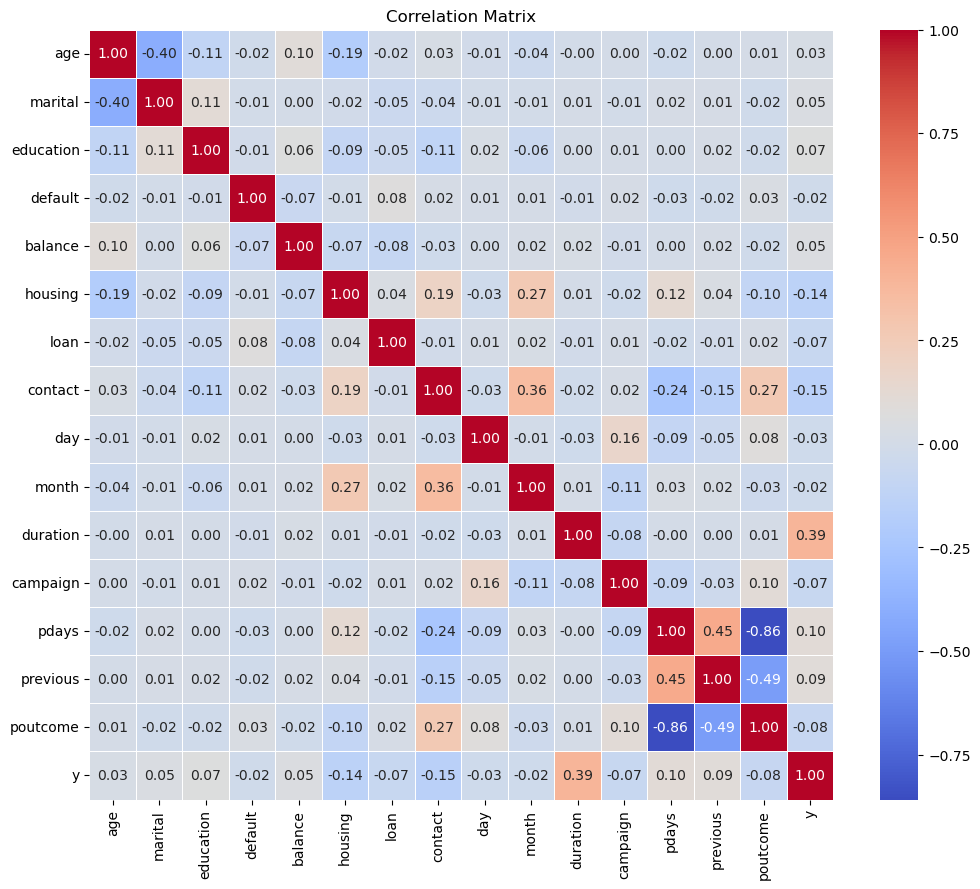

In [39]:
import seaborn as sns
data2 = pd.read_csv('bank-full.csv', sep=',')  # Adjust path as needed

# Preprocessing to convert categorical variables to numeric
# This step is necessary to compute a correlation matrix which requires numeric values
label_encoders = {}
categorical_columns = ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for col in categorical_columns:
    print(data2.columns)
    data2[col] = pd.Categorical(data2[col])
    data2[col] = data2[col].cat.codes

# Convert the target variable 'y'
data2['y'] = pd.Categorical(data2['y'])
data2['y'] = data2['y'].cat.codes

# Calculate the correlation matrix
corr_matrix = data2.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

# Load data
data = pd.read_csv('bank-full.csv', sep=',')  # Adjust path as needed
print(data.columns)
# Identify categorical columns (not needed after encoding)
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Identify numerical columns (assuming they're the rest of the columns not listed in categorical_columns)
numerical_cols = [col for col in data.columns if col not in categorical_columns + ['y']]

# One-hot encode categorical variables
data = pd.get_dummies(data, columns=categorical_columns)

# Encode the target variable 'y'
data['y'] = data['y'].map({'yes': 1, 'no': 0})

# Separating features and target variable
X = data.drop('y', axis=1)
y = data['y']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical columns and leave categorical ones untouched since they are already encoded
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ],
    remainder='passthrough'  # Allows the encoded categorical features to pass through
)

# Create a logistic regression object
logistic = LogisticRegression(max_iter=1000)

# Since you've one-hot encoded your data outside of the ColumnTransformer, you only need to scale the numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)  # Only scale numerical columns
    ],
    remainder='passthrough'  # Non-scaled columns are already one-hot encoded
)

# Create a pipeline that includes the preprocessor, SMOTE, and logistic regression
pipeline = imbalanced_make_pipeline(preprocessor, SMOTE(random_state=42), logistic)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Extract the logistic regression model from the pipeline
log_reg_model = pipeline.named_steps['logisticregression']

# Get the coefficients and the intercept
coefficients = log_reg_model.coef_[0]
intercept = log_reg_model.intercept_[0]

# The feature names will be the columns of 'X_train' after preprocessing
# Since we've used remainder='passthrough', all columns should be in order
feature_names = X_train.columns

# Creating a DataFrame to display feature names and their corresponding coefficients
coef_df = pd.DataFrame(zip(feature_names, coefficients), columns=['Feature', 'Coefficient'])

# Display the coefficients and the intercept
print(coef_df)
print(f'Intercept: {intercept}')


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
                Feature  Coefficient
0                   age     0.025477
1               balance     0.009673
2                   day     0.056678
3              duration     1.627250
4              campaign    -0.405875
5                 pdays     0.006804
6              previous     0.056526
7            job_admin.     0.217082
8       job_blue-collar    -0.131130
9      job_entrepreneur    -0.269244
10        job_housemaid    -0.532001
11       job_management     0.102904
12          job_retired     0.507200
13    job_self-employed    -0.274289
14         job_services    -0.089597
15          job_student     0.812044
16       job_technician     0.037442
17       job_unemployed    -0.154581
18          job_unknown    -0.440348
19     marital_divorced    -0.166124
20      mar

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8451841203140551
Confusion Matrix:
 [[6751 1201]
 [ 199  892]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.91      7952
           1       0.43      0.82      0.56      1091

    accuracy                           0.85      9043
   macro avg       0.70      0.83      0.73      9043
weighted avg       0.91      0.85      0.86      9043



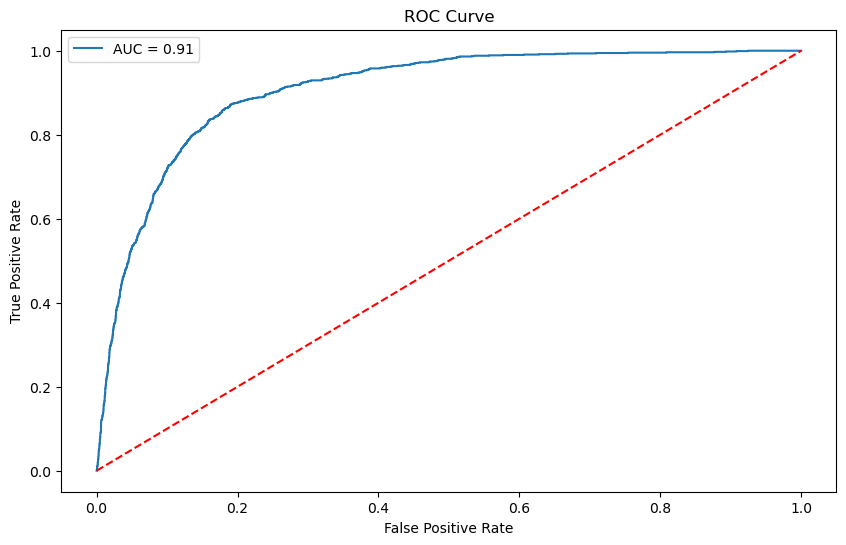

In [43]:
#roc curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC
auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# Final Iteration:
   1. 1-HOT ENCODING
   2. SCALING
   3. SMOTE
   4. GRID SEARCH

In [44]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('bank-full.csv', sep=',') 

# Step 1: Create a new binary feature
data['contacted_before'] = np.where(data['pdays'] == -1, 0, 1)

# Step 2: Impute the -1 values in 'pdays'
# For this example, let's replace -1 with the median of the positive 'pdays' values
median_pdays = data.loc[data['pdays'] != -1, 'pdays'].median()
data['pdays'] = data['pdays'].replace(-1, median_pdays)

# Step 3: Scale 'pdays' if necessary
scaler = MinMaxScaler()
data['pdays_scaled'] = scaler.fit_transform(data[['pdays']])


In [45]:
import numpy as np

def compute_woe(data, feature, target):
    """
    Computes the Weight of Evidence for a categorical feature.
    """
    # Calculate the number of events and non-events in each category
    total_events = data[target].sum()
    total_non_events = len(data) - total_events
    
    # Calculate the number of events and non-events for each category
    grouped = data.groupby(feature)[target].agg([('Events', 'sum'), ('Non-Events', 'count')])
    
    # Adjust event and non-event counts to avoid division by zero and logarithm of zero
    grouped['Events'] = grouped['Events'].apply(lambda x: max(x, 0.5))
    grouped['Non-Events'] = grouped['Non-Events'].apply(lambda x: max(x, 0.5))
    
    # Calculate WoE
    grouped['WoE'] = np.log(grouped['Events'] / total_events) - np.log(grouped['Non-Events'] / total_non_events)
    
    return grouped['WoE']



# Encode the target variable 'y'
data['y'] = data['y'].map({'yes': 1, 'no': 0})
# Compute WoE for each categorical variable
for col in ['contact', 'poutcome', 'education', 'job']:
    woe_values = compute_woe(data, col, 'y')
    
    # Map the computed WoE values back onto the data
    data[col + '_woe'] = data[col].map(woe_values)

# Make sure to drop the original categorical columns if you plan to use only WoE values
data.drop(columns=['contact', 'poutcome', 'education', 'job'], inplace=True)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

# Assuming 'bank-full.csv' is in the current working directory. Adjust the path if the file is located elsewhere.
data = pd.read_csv('bank-full.csv', sep=',') 

# Identify categorical columns (assuming these are the only categorical columns)
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Identify numerical columns (assuming they're the rest of the columns not listed in categorical_columns)
numerical_cols = [col for col in data.columns if col not in categorical_columns + ['y']]

# One-hot encode categorical variables
data = pd.get_dummies(data, columns=categorical_columns)


# Separating features and target variable
X = data.drop('y', axis=1)
y = data['y']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a column transformer for scaling numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ],
    remainder='passthrough'  # Allows the encoded categorical features to pass through
)

# Create a logistic regression object
logistic = LogisticRegression(max_iter=1000)

# Create a pipeline that includes the preprocessor, SMOTE, and logistic regression
pipeline = imbalanced_make_pipeline(preprocessor, SMOTE(random_state=42), logistic)

param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'logisticregression__penalty': ['l1', 'l2'],  # Type of regularization
    'logisticregression__solver': ['liblinear', 'saga'] # penalty
}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# The best combination of parameters found during the grid search
best_params = grid_search.best_params_

# The best score during the grid search
best_score = grid_search.best_score_

# Extract the best estimator (pipeline) directly
best_pipeline = grid_search.best_estimator_

# Now you can access the logistic regression model from the best_pipeline
best_logistic_regression = best_pipeline.named_steps['logisticregression']

# Extracting coefficients and intercept from the best model
coefficients = best_logistic_regression.coef_[0]
intercept = best_logistic_regression.intercept_[0]

# Output the results
best_params, best_score, coefficients, intercept

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Predict on the test set
y_pred = best_pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming 'bank-full.csv' is in the current working directory. Adjust the path if the file is located elsewhere.
data = pd.read_csv('bank-full.csv', sep=';') 

data.drop(columns=['poutcome'], inplace=True)  
# Identify categorical columns (assuming these are the only categorical columns)
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']

# Identify numerical columns (assuming they're the rest of the columns not listed in categorical_columns)
numerical_cols = [col for col in data.columns if col not in categorical_columns + ['y']]

# One-hot encode categorical variables and map target variable
data = pd.get_dummies(data, columns=categorical_columns)
data['y'] = data['y'].map({'yes': 1, 'no': 0})

# Separating features and target variable
X = data.drop('y', axis=1)
y = data['y']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a column transformer for scaling numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ],
    remainder='passthrough'  # Allows the encoded categorical features to pass through
)

# Create a logistic regression object
logistic = LogisticRegression(max_iter=1000)

# Create a pipeline that includes the preprocessor, SMOTE, and logistic regression
pipeline = imbalanced_make_pipeline(preprocessor, SMOTE(random_state=42), logistic)

# Grid search parameters
param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'logisticregression__penalty': ['l1', 'l2'],  # Type of regularization
    'logisticregression__solver': ['liblinear', 'saga'],  # Solvers compatible with l1 penalty
    'logisticregression__class_weight': ['balanced',{0: 0.88, 1: 0.12}]  # Class weights for imbalanced data
}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Extract the best estimator (pipeline) directly
best_pipeline = grid_search.best_estimator_



In [ ]:
# Calculate F1 score for each possible threshold
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# Predict probabilities
probabilities = best_pipeline.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, probabilities)
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the index of the highest F1 score
optimal_idx = np.argmax(f1_scores)

# Find the threshold that gives the highest F1 score
optimal_threshold = thresholds[optimal_idx]

# Display the optimal threshold with corresponding F1 score
print("Optimal Threshold for maximum F1 score:", optimal_threshold)
print("Maximum F1 Score:", f1_scores[optimal_idx])

# Plot the precision-recall curve
display = PrecisionRecallDisplay(precision=precision, recall=recall)
display.plot()
plt.title('Precision-Recall curve')
plt.show()

In [ ]:
# Predict on the test set using the best_pipeline
import numpy as np
y_pred = best_pipeline.predict(X_test)
y_pred_proba = best_pipeline.predict_proba(X_test)[:, 1]
threshold = optimal_threshold
y_pred_new_threshold = np.where(y_pred_proba >= threshold, 1, 0)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_new_threshold)
conf_matrix = confusion_matrix(y_test, y_pred_new_threshold)
class_report = classification_report(y_test, y_pred_new_threshold)

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Output the results
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
